In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
df1=pd.read_excel('sales_data.xlsx')

In [3]:
df1.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction id         541909 non-null  object        
 1   product id             541909 non-null  object        
 2   product description    540455 non-null  object        
 3   quantity sold          541909 non-null  int64         
 4   transaction timestamp  541909 non-null  datetime64[ns]
 5   unit price             541909 non-null  float64       
 6   customer id            406829 non-null  float64       
 7   transaction country    541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# check missing values for each column 
df1.isnull().sum().sort_values(ascending=False)

customer id              135080
product description        1454
transaction country           0
unit price                    0
transaction timestamp         0
quantity sold                 0
product id                    0
transaction id                0
dtype: int64

In [6]:
# check out the rows with missing values
df1[df1.isnull().any(axis=1)].head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [7]:
# df_new without missing values
df1= df1.dropna()

In [8]:
# check missing values for each column 
df1.isnull().sum().sort_values(ascending=False)

transaction country      0
customer id              0
unit price               0
transaction timestamp    0
quantity sold            0
product description      0
product id               0
transaction id           0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction id         406829 non-null  object        
 1   product id             406829 non-null  object        
 2   product description    406829 non-null  object        
 3   quantity sold          406829 non-null  int64         
 4   transaction timestamp  406829 non-null  datetime64[ns]
 5   unit price             406829 non-null  float64       
 6   customer id            406829 non-null  float64       
 7   transaction country    406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
# change columns type - String to Int type 
df1['customer id'] = df1['customer id'].astype('int64')

In [11]:
# change columns type - String to Int type 
df1['transaction id'] = df1['transaction id'].astype('str')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction id         406829 non-null  object        
 1   product id             406829 non-null  object        
 2   product description    406829 non-null  object        
 3   quantity sold          406829 non-null  int64         
 4   transaction timestamp  406829 non-null  datetime64[ns]
 5   unit price             406829 non-null  float64       
 6   customer id            406829 non-null  int64         
 7   transaction country    406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [13]:
df1.describe().round(2)


,quantity sold,unit price,customer id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [14]:
df1.rename(columns={'quantity sold':'quantity'},inplace=True)

In [15]:
df_new = df1[df1.quantity> 0]


In [16]:
df_cancel=df1[df1.quantity<0]

In [17]:
df_new.describe().round(2)


,quantity,unit price,customer id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [18]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit price']

In [19]:
df_new.head()

,transaction id,product id,product description,quantity,transaction timestamp,unit price,customer id,transaction country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# change the column names
df_new.rename(index=str, columns={'transaction id': 'transaction_id',
                              'product id' : 'product_id',
                              'product description' : 'product_description',
                              'quantity' : 'quantity',
                              'transaction timestamp' : 'transaction_timestamp',
                              'unit price' : 'unit_price',
                              'transaction country' : 'transaction_country',
                                  'customer id':'customer_id'
                        }, inplace=True)

In [21]:
df_new.insert(loc=2, column='year_month', value=df_new['transaction_timestamp'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.transaction_timestamp.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.transaction_timestamp.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.transaction_timestamp.dt.hour)

In [22]:
df_new.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Exploratory Data Analysis (EDA)

## Orders made by customers

In [23]:
df_new.groupby(by=['customer_id','transaction_country'], as_index=False)['transaction_id'].count().head(10)

,customer_id,transaction_country,transaction_id
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


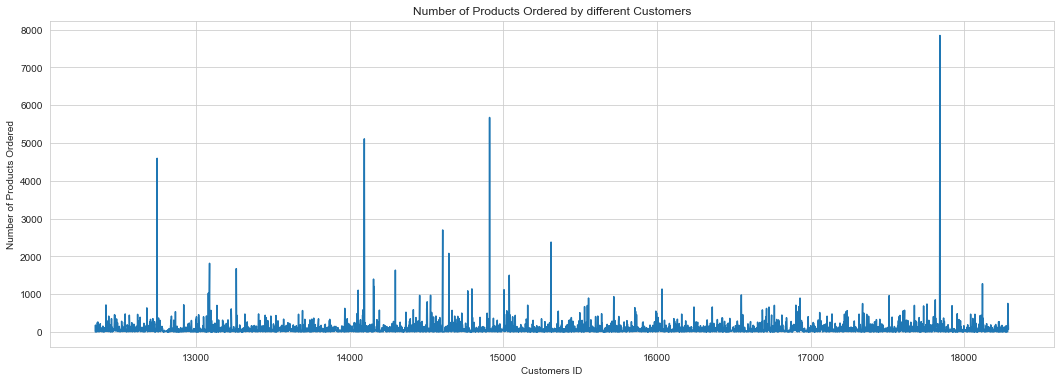

In [86]:
orders = df_new.groupby(by=['customer_id','transaction_country'], as_index=False)['transaction_id'].count()

plt.subplots(figsize=(18,6))
plt.plot(orders.customer_id, orders.transaction_id)
plt.xlabel('Customers ID')
plt.ylabel('Number of Products Ordered')
plt.title('Number of Products Ordered by different Customers')
plt.show()

In [88]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='transaction_id', ascending=False).head(10)

The TOP 5 customers with most number of orders...


,customer_id,transaction_country,transaction_id
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


In [91]:
orders.sort_values(by='transaction_id', ascending=False).head(10).to_csv('customer.csv')

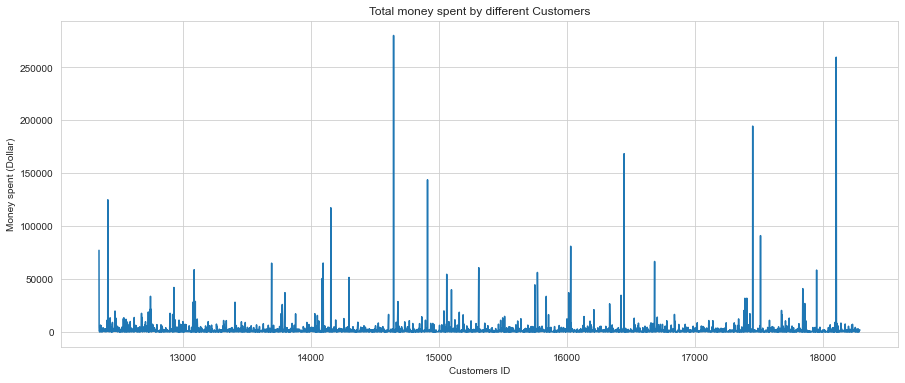

In [87]:
money_spent = df_new.groupby(by=['customer_id','transaction_country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Total money spent by different Customers')
plt.show()

In [27]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,customer_id,transaction_country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [92]:
money_spent.sort_values(by='amount_spent', ascending=False).head(10).to_csv('c.csv')

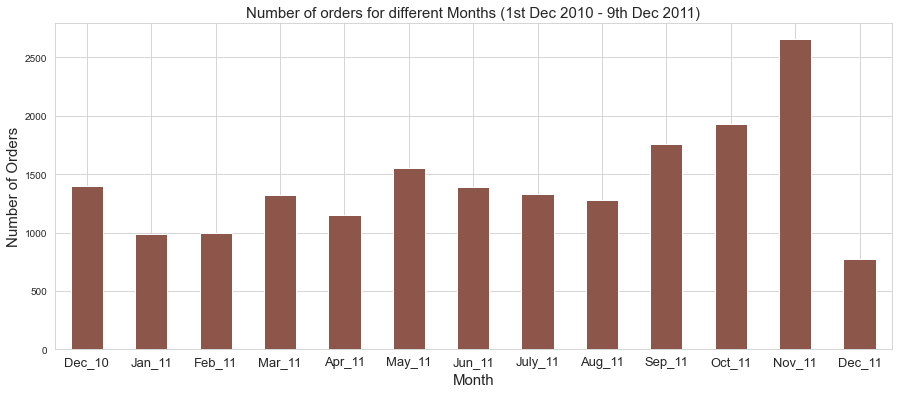

In [84]:
ax = df_new.groupby('transaction_id')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[5],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [29]:
df_new.groupby('transaction_id')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

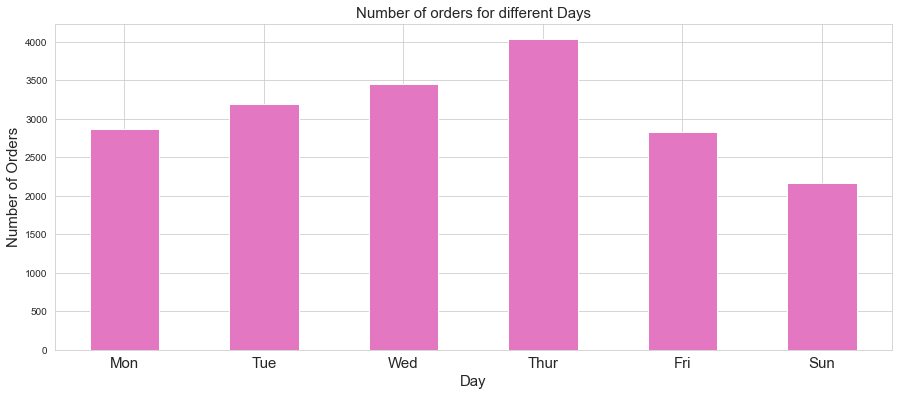

In [30]:
ax = df_new.groupby('transaction_id')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[6],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many Orders(per hour)

In [31]:
df_new.groupby('transaction_id')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

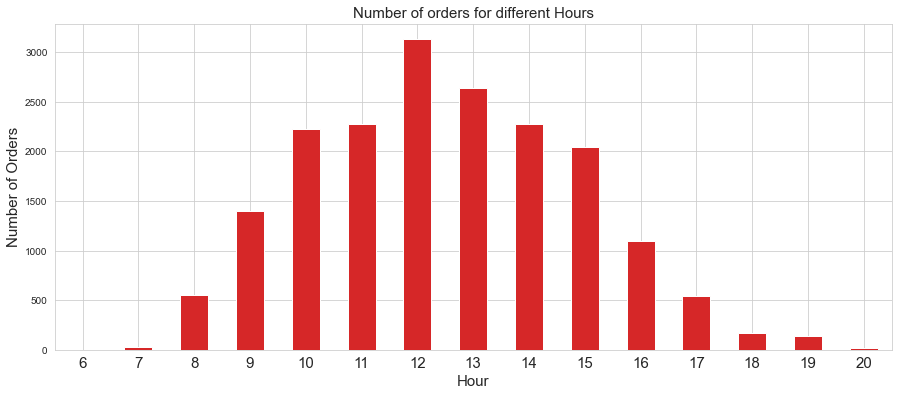

In [32]:
ax = df_new.groupby('transaction_id')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[3],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()


## Discover Patterns for Unit Price

In [33]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

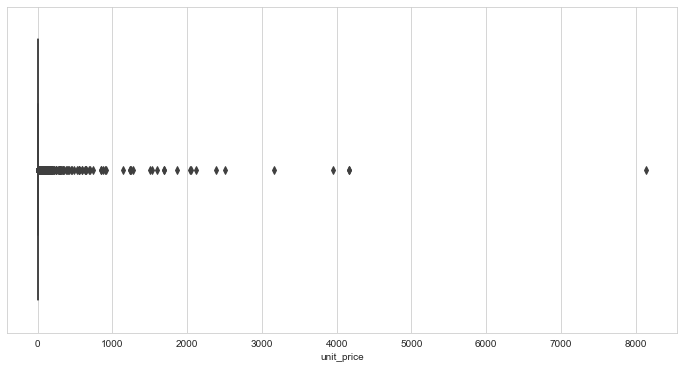

In [34]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [35]:
df_free = df_new[df_new.unit_price == 0]

In [36]:
df_free.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


In [37]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

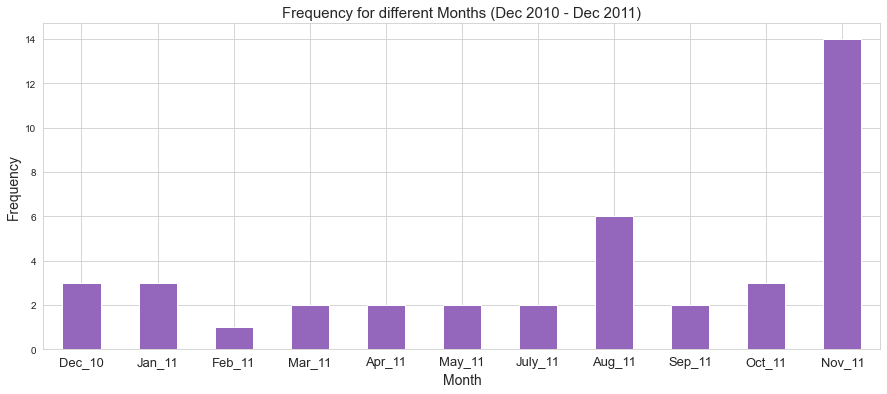

In [98]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(15,6), color=color[4])
ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

## Discover Patterns for each country

In [39]:
df_new.head()


,transaction_id,product_id,year_month,month,day,hour,product_description,quantity,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


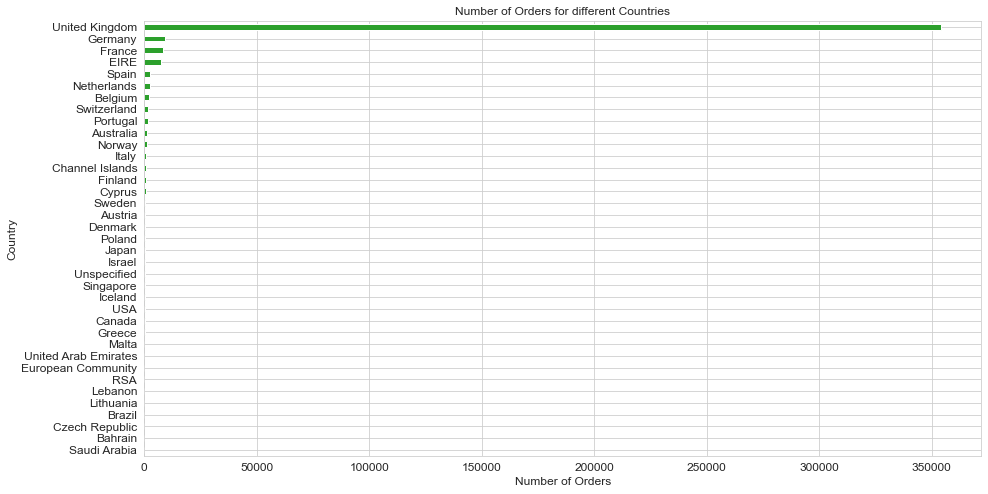

In [40]:
group_country_orders = df_new.groupby('transaction_country')['transaction_id'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[2])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

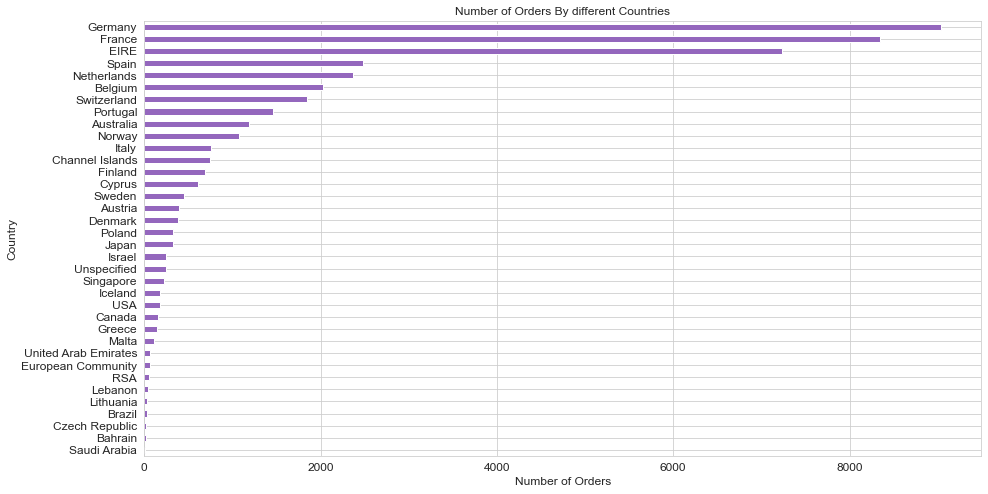

In [99]:
group_country_orders = df_new.groupby('transaction_country')['transaction_id'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[4])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders By different Countries', fontsize=12)
plt.show()

## How much money spent by each country

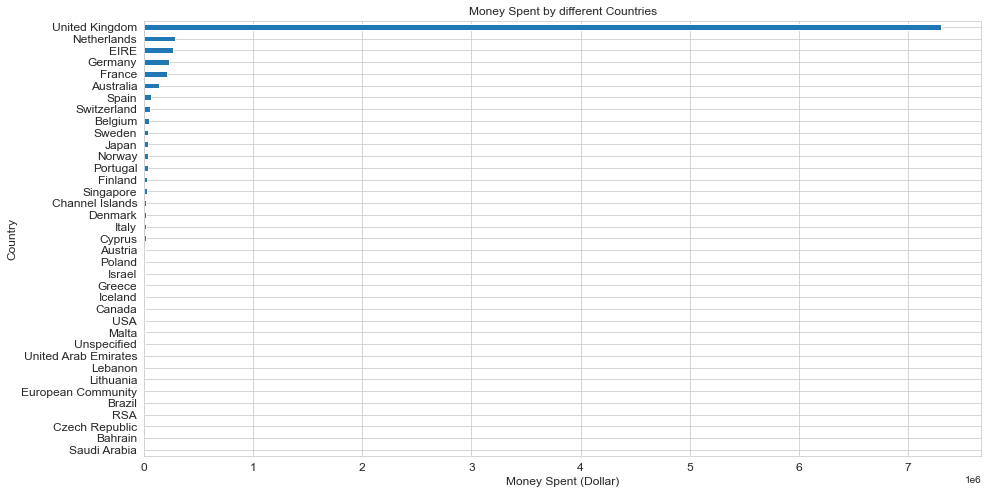

In [42]:
group_country_amount_spent = df_new.groupby('transaction_country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

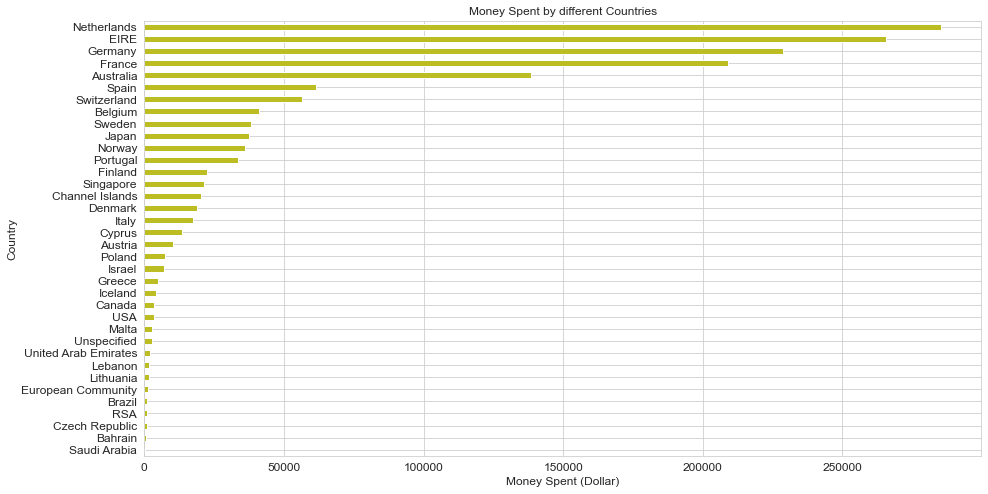

In [43]:
group_country_amount_spent = df_new.groupby('transaction_country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[8])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()


In [44]:
df_new.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [45]:
monthly_amount_spent=df_new.groupby('year_month')['amount_spent'].sum()


In [46]:
monthly_amount_spent

year_month
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: amount_spent, dtype: float64

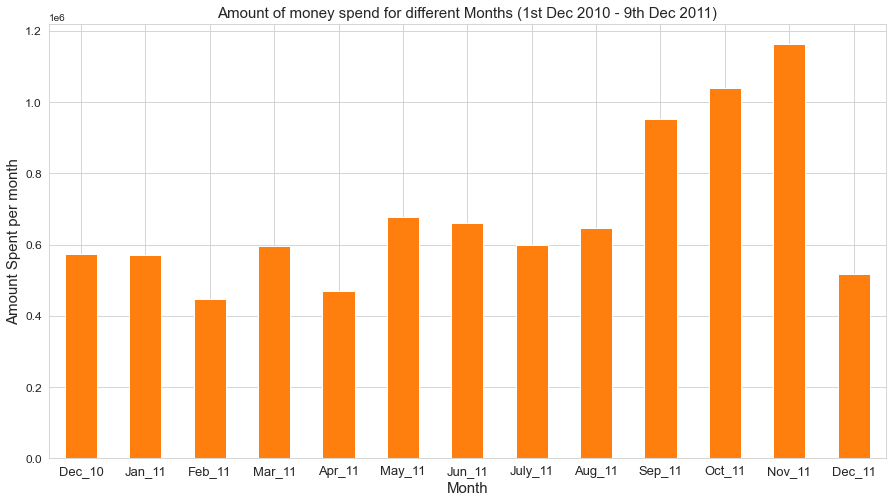

In [101]:
plt.subplots(figsize=(15,8))
ax=monthly_amount_spent.plot(kind='bar',fontsize=12,color=color[1])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Amount Spent per month',fontsize=15)
ax.set_title('Amount of money spend for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [48]:
df_nod=df_new.groupby('transaction_id')['year_month'].unique().value_counts().sort_index()

In [49]:
df_nod

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

In [50]:
df_nod[1]

987

In [51]:
monthly_amount_spent

year_month
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: amount_spent, dtype: float64

In [52]:
revarray=monthly_amount_spent.values

In [53]:
revarray

array([ 572713.89000002,  569445.04000001,  447137.35000002,
        595500.76000001,  469200.36100001,  678594.56      ,
        661213.69000001,  600091.01100001,  645343.90000001,
        952838.382     , 1039318.78999998, 1161817.37999994,
        518192.79      ])

In [54]:
ordarray=df_nod.values

In [55]:
aov=revarray/ordarray

In [56]:
aov

array([409.08135   , 576.94532928, 448.03341683, 450.79542771,
       408.35540557, 436.39521543, 474.66883704, 450.85725845,
       503.7813427 , 542.61866856, 538.78630897, 437.10209932,
       666.05757069])

In [57]:
indarray=monthly_amount_spent.index.values

In [58]:
aovs=pd.Series(aov,index=indarray)

In [59]:
aovs

201012    409.081350
201101    576.945329
201102    448.033417
201103    450.795428
201104    408.355406
201105    436.395215
201106    474.668837
201107    450.857258
201108    503.781343
201109    542.618669
201110    538.786309
201111    437.102099
201112    666.057571
dtype: float64

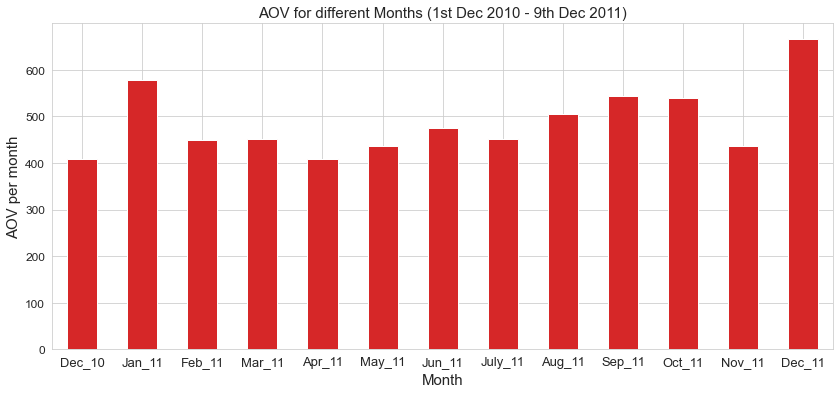

In [60]:
plt.subplots(figsize=(14,6))
ax=aovs.plot(kind='bar',fontsize=12,color=color[3])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('AOV per month',fontsize=15)
ax.set_title('AOV for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [61]:
df_ts = df_new[['transaction_timestamp','amount_spent']]
df_ts.head()

,transaction_timestamp,amount_spent
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [62]:
df_ts.set_index('transaction_timestamp',inplace=True)

In [63]:
df_ts.head()

,amount_spent
transaction_timestamp,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


<Figure size 2520x2880 with 0 Axes>

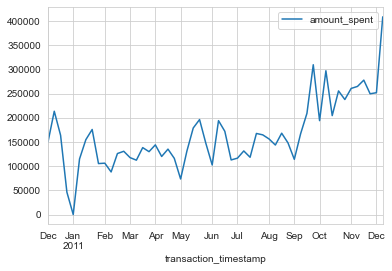

In [79]:
plt.figure(figsize=(35,40))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

In [65]:
df_new['product_description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: product_description, dtype: int64

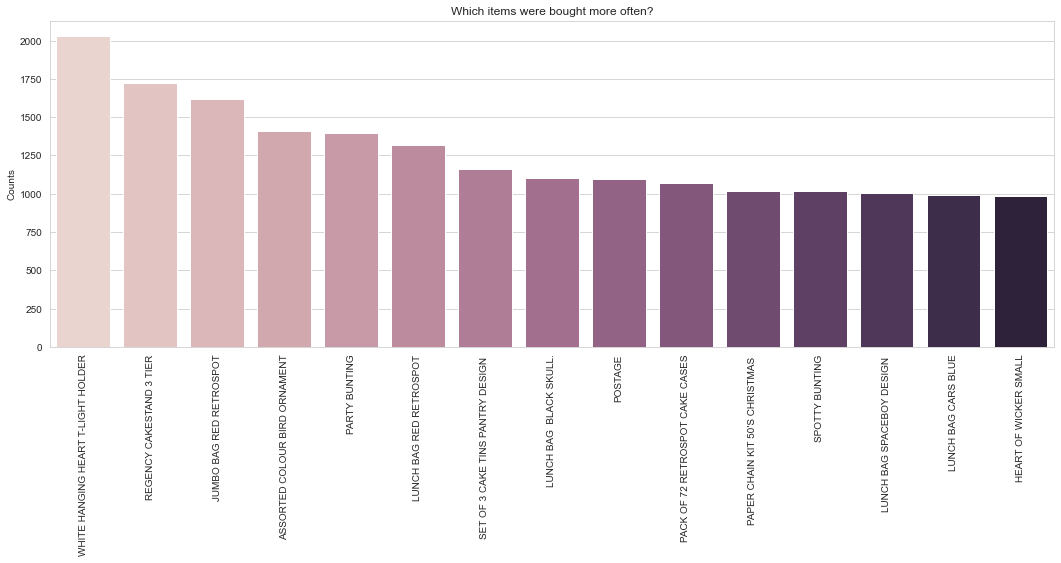

In [66]:
item_counts = df_new['product_description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [67]:
df_new['product_description'].value_counts().tail()


LIGHT DECORATION BATTERY OPERATED    1
PURPLE CHUNKY GLASS+BEAD NECKLACE    1
GLASS BELL JAR SMALL                 1
CAT WITH SUNGLASSES BLANK CARD       1
UNION JACK HOT WATER BOTTLE          1
Name: product_description, dtype: int64

In [68]:
df_new[~df_new['product_description'].str.isupper()]['product_description'].value_counts().head()


Manual                                290
BAG 125g SWIRLY MARBLES               247
3 TRADITIONAl BISCUIT CUTTERS  SET    205
BAG 250g SWIRLY MARBLES               198
POLYESTER FILLER PAD 40x40cm          182
Name: product_description, dtype: int64

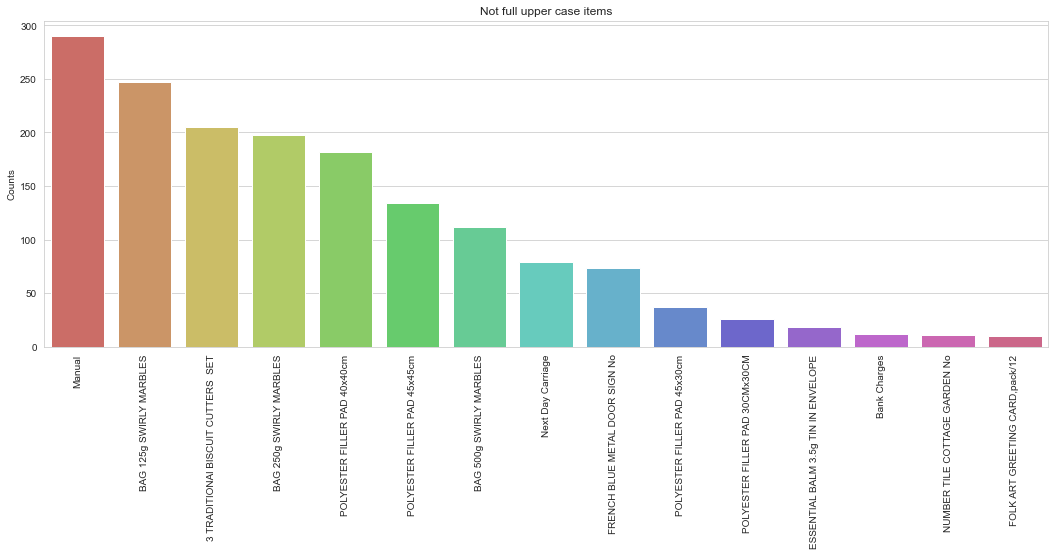

In [69]:
lcase_counts = df_new[~df_new['product_description'].str.isupper()]['product_description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

In [70]:
df_cancel= df1[df1.quantity<0]


In [71]:
df_cancel.rename(index=str, columns={'transaction id': 'transaction_id',
                              'product id' : 'product_id',
                              'product description' : 'product_description',
                              'quantity' : 'quantity',
                              'transaction timestamp' : 'transaction_timestamp',
                              'unit price' : 'unit_price',
                              'transaction country' : 'transaction_country',
                                  'customer id':'customer_id'
                        }, inplace=True)

In [72]:
df_cancel.insert(loc=2, column='year_month', value=df_cancel['transaction_timestamp'].map(lambda x: 100*x.year + x.month))
df_cancel.insert(loc=3, column='month', value=df_cancel.transaction_timestamp.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_cancel.insert(loc=4, column='day', value=(df_cancel.transaction_timestamp.dt.dayofweek)+1)
df_cancel.insert(loc=5, column='hour', value=df_cancel.transaction_timestamp.dt.hour)

In [73]:
df_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 141 to 541717
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         8905 non-null   object        
 1   product_id             8905 non-null   object        
 2   year_month             8905 non-null   int64         
 3   month                  8905 non-null   int64         
 4   day                    8905 non-null   int64         
 5   hour                   8905 non-null   int64         
 6   product_description    8905 non-null   object        
 7   quantity               8905 non-null   int64         
 8   transaction_timestamp  8905 non-null   datetime64[ns]
 9   unit_price             8905 non-null   float64       
 10  customer_id            8905 non-null   int64         
 11  transaction_country    8905 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory us

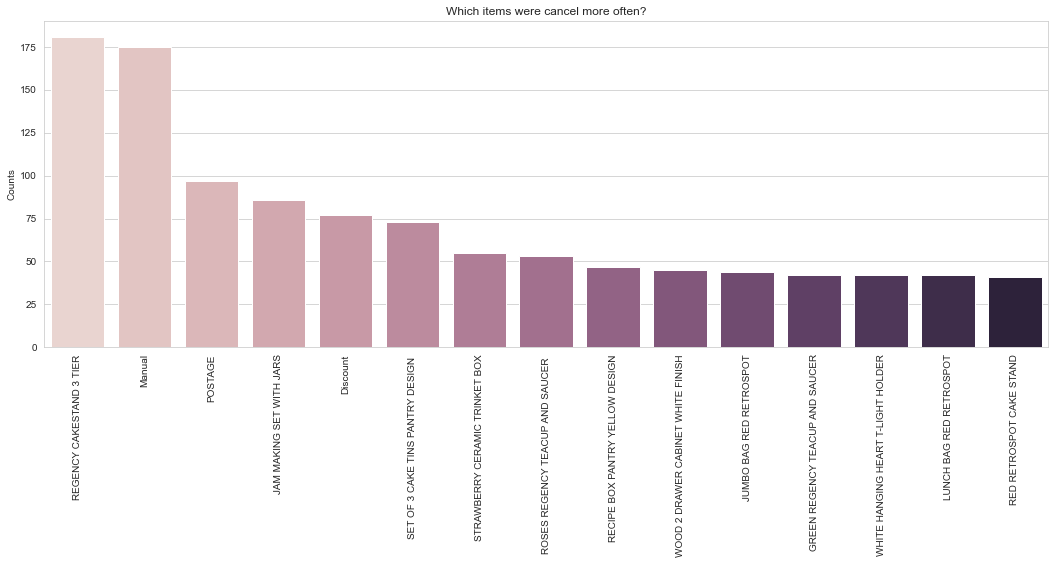

In [74]:
item_counts = df_cancel['product_description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were cancel more often?");
plt.xticks(rotation=90);

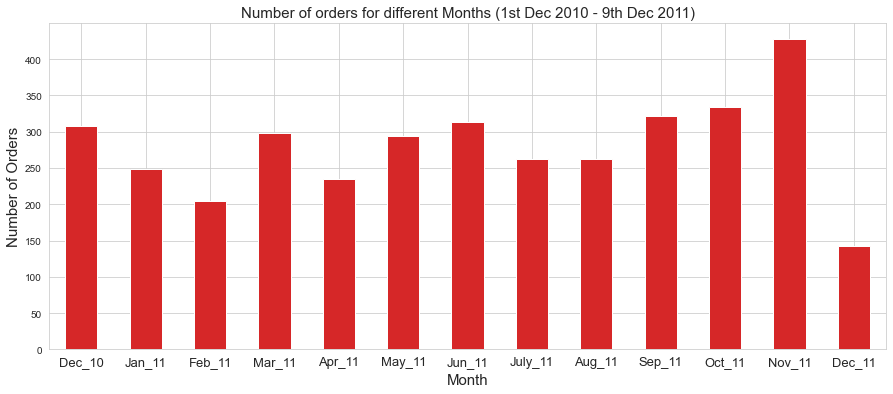

In [75]:
ax = df_cancel.groupby('transaction_id')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[3],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

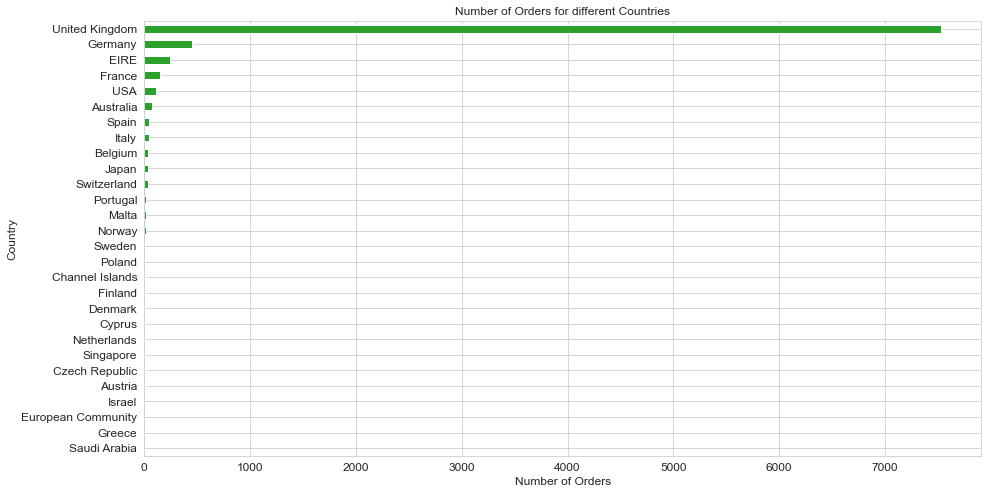

In [76]:
group_country_orders = df_cancel.groupby('transaction_country')['transaction_id'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[2])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

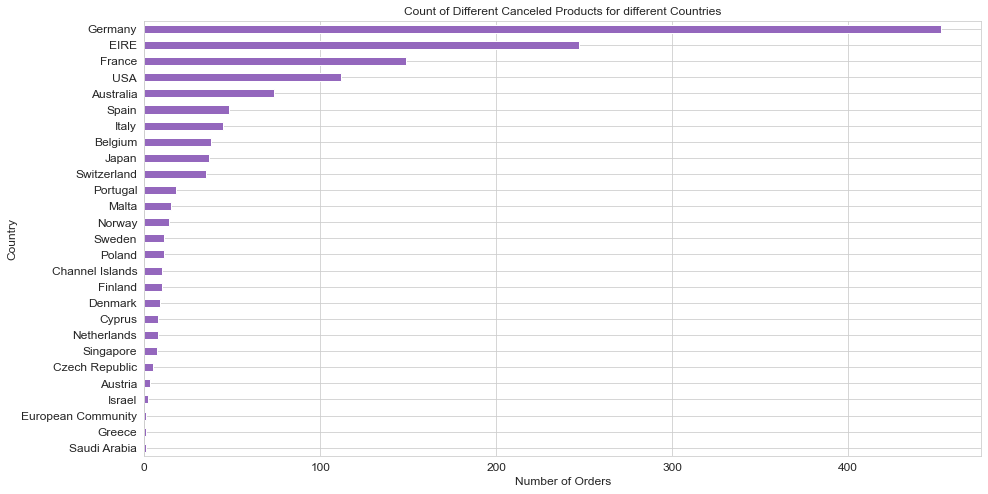

In [77]:
group_country_orders = df_cancel.groupby('transaction_country')['transaction_id'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[4])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Count of Different Canceled Products for different Countries', fontsize=12)
plt.show()